# Beispielanwendung Preiskalkulation

In diesem Notebook wird das erstellte Modell beispielhaft für die Berechnung eines individuellen Versicherungspreises pro Fahrt implementiert. 

Dies dient dazu aufzuzeigen, wie man ein gutes Modell einbinden könnte. Die berechneten Preise sind nicht unbedingt realistisch, da es in der Praxis weiterer Anpassungen bedarf. Z. B. stellt das berechnete Risiko noch nicht unbedingt einen realistischen Wert dar und es müssten noch die verschiedenen Zeiträume der Datenerhebungen berücksichtigt werden. Zusätzlich wird eine Schätzung von durchschnittlich 5000 € Kosten pro von einem Fahrradfahrer verursachten Unfall angenommen (Materialschaden + Behandlungskosten etc.). Eine Versicherung kann ggf. besser abschätzen, wie hoch diese Kosten tatsächlich sind.

Laden des Datensatzes und Modells innerhalb einer Klasse zur Preiskalkulation:

In [ ]:
from datasets.citibike_dataset import CitibikeDataset
from modeling.price_calculator import PriceCalculator

citibike_dataset = CitibikeDataset("data/2023-citibike-tripdata/202312-citibike-tripdata/202312-citibike-tripdata_1.csv")

price_calculator = PriceCalculator("fitted_models/crash_model.pkl", citibike_dataset, cost_per_accident=5000)

c:\Users\JanSchmitz\code\axa_challenge\datasets\citibike_dataset.py:37: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


Vorhersage des erwarteten Versicherungspreises für eine Fahrt des Datensatzes:

In [10]:
i = 110
started_at = citibike_dataset.df_rides.loc[i, "started_at"]
start_station_id = citibike_dataset.df_rides.loc[i, "start_station_id"]

price, _ = price_calculator.predict_insurance_price(started_at, start_station_id)

price

np.float64(0.5965741011826251)

Plotten des Preishistogramms über eine Stichprobe der Citibike Fahrten:

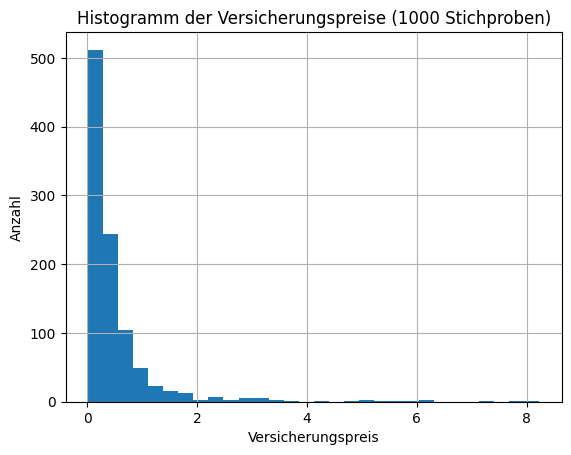

In [ ]:
import random
import matplotlib.pyplot as plt

i = 1000

sampled_rows = citibike_dataset.df_rides.sample(n=i, random_state=42)

prices = []

for _, row in sampled_rows.iterrows():
    started_at = row["started_at"]
    start_station_id = row["start_station_id"]
    price, _ = price_calculator.predict_insurance_price(started_at, start_station_id)
    prices.append(price)

plt.hist(prices, bins=30)
plt.xlabel("Versicherungspreis")
plt.ylabel("Anzahl")
plt.title(f"Histogramm der Versicherungspreise ({i} Stichproben)")
plt.grid(True)
plt.show()

Mit dem Modell wurde eine **adaptive Preisgestaltung je nach Startzeit und -ort einer Fahrt** umgesetzt. 

In den meisten Fällen ist der Versicherungspreis in einem vertretbaren Bereich, in manchen Fällen entstehen jedoch auch unrealistisch hohe Summen. 

Für den tatsächlichen Einsatz müssten weitere **Evaluierungen** durchgeführt werden. Zum Beispiel sollte berechnet werden, ob die eingenommenen Versicherungsbeiträge tatsächlich den entstandenen bzw. erwarteten Schaden decken. 